In [4]:
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#loading the dataset
d = pd.read_csv(r'/content/assignment4data.csv')
#visualizing the datasets 
print(d.shape)
d.head(5)
d.describe()

(3000, 785)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783,f784,label
count,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016333,0.163333,...,2.328333,1.800000,1.232000,0.790333,0.291667,0.033333,0.006667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042667,0.063333,0.004667,0.023333,0.351333,0.687000,0.585000,0.598667,0.812333,0.517000,0.320667,0.142667,0.109333,0.029667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.417667
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894614,5.916220,...,21.018527,18.556799,15.193983,12.527890,6.759425,1.350616,0.365148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.336950,3.468910,0.255604,1.278019,6.931372,12.226018,10.755495,9.880797,12.715542,9.882355,7.909869,5.313165,4.817376,1.392875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.907468
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000,240.000000,...,255.000000,254.000000,254.000000,251.000000,253.000000,71.000000,20.000000,0

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

X=d.iloc[:,0:784]  # taking all the features
y = d.iloc[:,784]   #labels
print(X.shape)
print(y.shape)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
#splitting the dataset into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2)
#reshaping labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(3000, 784)
(3000,)
(2400, 10)


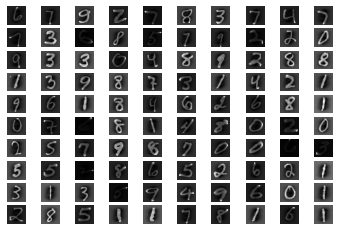

In [6]:
# Lets visualize the first 100 images from the dataset
X_image = X_train.reshape(X_train.shape[0], 28, 28) # reshaping into images
for i in range(100):
    ax = plt.subplot(10,10,i+1) # ten rows and ten columns
    ax.axis('off')
    plt.imshow(X_image[i], cmap='gray')  # cmap is colormap


In [7]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

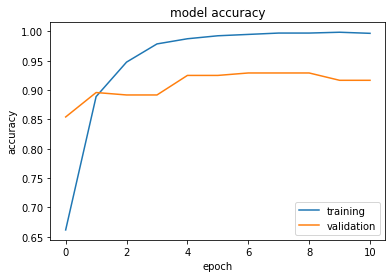

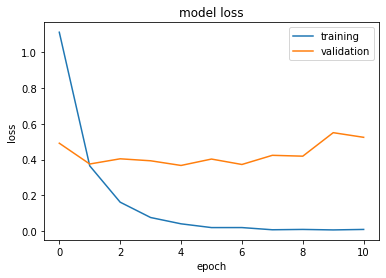

Test loss: 0.345
Test accuracy: 0.925


In [8]:
from keras.layers import Dropout # regularization pararmeters
from keras.callbacks import EarlyStopping
long_model_two = Sequential()
long_model_two.add(Dense(units=2048, activation='relu', input_shape=(784,)))
long_model_two.add(Dense(units=1024, activation='relu'))
long_model_two.add(Dropout(rate=0.1))
long_model_two.add(Dense(units=512, activation='relu'))
long_model_two.add(Dropout(rate=0.1))
long_model_two.add(Dense(units=256, activation='relu'))
long_model_two.add(Dropout(rate=0.1))
#long_model_two.add(Dense(units=128, activation='relu'))
#long_model_two.add(Dropout(rate=0.1))
#long_model_two.add(Dense(units=64, activation='relu'))
#long_model_two.add(Dropout(rate=0.2))
#long_model_two.add(Dense(units=32, activation='relu'))
long_model_two.add(Dense(units=10, activation='softmax'))
long_model_two.summary()

long_model_two.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
# There are lots of parameters you can set here, including the amount that counts as a change
# what metric to watch, and more. See the documentation for more details. We'll keep it
# simple for now, and use the defaults for most of these. 
early_stopper = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = long_model_two.fit(X_train, y_train, batch_size=256, epochs=50, verbose=True, validation_split=.1,callbacks=[early_stopper])
plot_training_history(history, long_model_two)

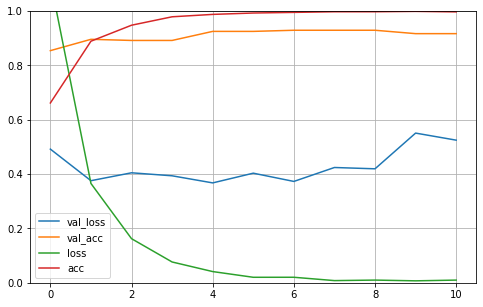

In [9]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [10]:

# Generate generalization metrics
score = long_model_two.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.34500085552533466 / Test accuracy: 0.925000011920929


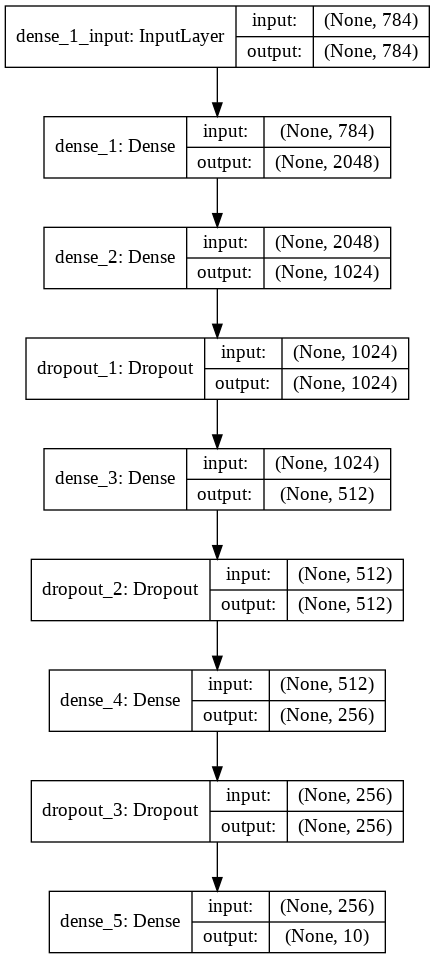

In [11]:
from keras.utils import plot_model
plot_model(long_model_two, to_file='model.png', show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


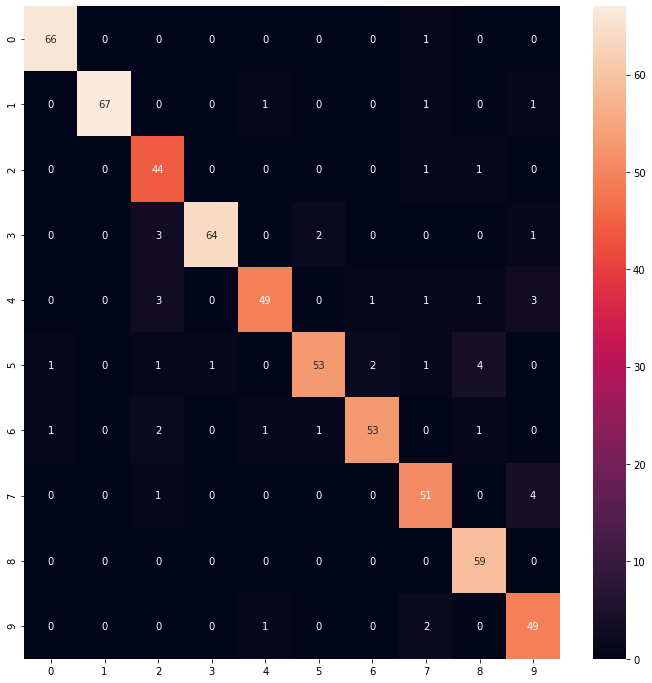

In [12]:
# When did our evaluator do poorly?
# invoking confusion matrix 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import itertools
labels = ['0','1','2','3','4','5','6','7','8','9']
predictions = long_model_two.predict(X_test)

cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_test, axis=1))

plt.figure(figsize = (12, 12))

sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

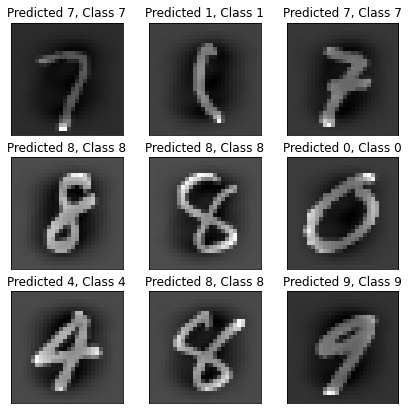

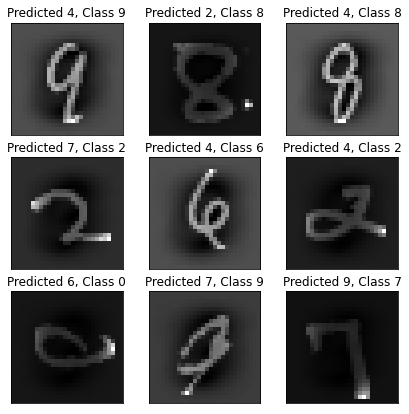

In [13]:
predicted_classes = long_model_two.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != y_test.argmax(axis=-1))[0]

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

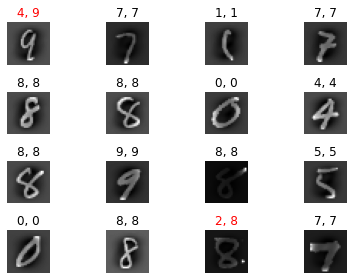

In [14]:
from numpy import argmax
# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}

X_image_test = X_test.reshape(X_test.shape[0], 28, 28)  # reshaping the test data ito images

# Repeatedly running this cell will page through the predictions
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(X_image_test[i + page], cmap='gray')
    prediction = argmax(predictions[i + page])
    true_value = argmax(y_test[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()

In [15]:
score_train = long_model_two.evaluate(X_train, y_train, verbose=0)
print(f'Train loss: {score_train[0]} / Train accuracy: {score_train[1]}')


Train loss: 0.04755231465213001 / Train accuracy: 0.9904166460037231


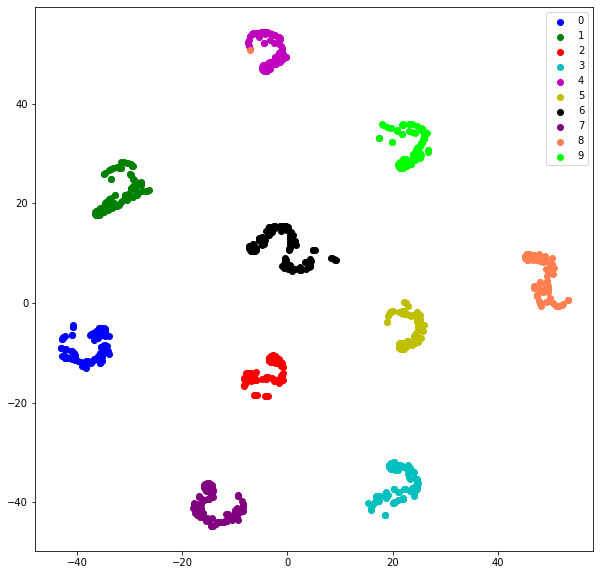

In [16]:
from sklearn.manifold import TSNE
hidden_features = long_model_two.predict(X_train)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues
colors_map = np.argmax(y_train, axis=1)

colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(10):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

In [17]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()
p = figure(plot_width=600, plot_height=600)

colors = [x for x in 'blue-green-red-cyan-magenta-yellow-black-purple-coral-lime'.split('-')]
colors_map = colors_map[:1000]
for cl in range(10):
    indices = np.where(colors_map==cl)
    p.circle(X_tsne[indices, 0].ravel(), X_tsne[indices, 1].ravel(), size=7, 
             color=colors[cl], alpha=0.4, legend=str(cl))

# show the results
p.legend.location = 'bottom_right'
show(p)

In [18]:
#loading the dataset
pca_d = pd.read_csv(r'/content/17074.csv')
#visualizing the datasets 
print(pca_d.shape)
pca_d.head(5)
pca_d.describe()

(3000, 26)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,0.089573,-0.022203,-0.078888,0.053819,0.041640,-0.022322,-0.024524,-0.029705,0.006753,-0.093472,-0.006144,0.054692,-0.020036,-0.092593,-0.008294,-0.003560,-0.001241,-0.000824,0.048250,-0.003106,-0.004690,-0.017859,0.008268,0.055416,-0.022773,4.41400
std,6.331834,5.385672,5.145000,4.552949,4.292890,3.979917,3.757531,3.546733,3.272790,3.179002,3.081842,2.894004,2.840449,2.796301,2.690290,2.668535,2.523353,2.627147,2.478958,2.432174,2.360791,2.436759,2.433168,2.370943,2.268579,2.85727
min,-29.907579,-14.860376,-15.716220,-15.897518,-18.600840,-19.225357,-12.593399,-22.026633,-14.306845,-14.792152,-18.597562,-15.688903,-17.896222,-12.301265,-11.945581,-12.755283,-16.211951,-24.559359,-13.161617,-13.965545,-21.418250,-16.937006,-15.202750,-17.864836,-20.481216,0.00000
25%,-3.045284,-3.391179,-3.693508,-2.551608,-2.796835,-2.541744,-2.353327,-2.040381,-2.080032,-2.133400,-1.986159,-1.865100,-1.645459,-1.974783,-1.481383,-1.398548,-1.213158,-1.588787,-1.307237,-1.339103,-1.375820,-1.365099,-1.286050,-1.240641,-1.275945,2.00000
50%,1.463842,-0.478033,0.259777,0.105420,0.237246,0.410702,-0.218281,0.040351,-0.251781,-0.172914,-0.061941,-0.159568,-0.060810,-0.206353,-0.034678,0.059802,0.159893,0.056224,-0.000379,-0.037843,-0.031962,-0.010242,0.073732,0.090086,0.077034,4.00000
75%,4.678565,3.119950,3.391225,2.355254,2.997296,2.996492,1.923265,2.388744,1.822525,1.781690,2.035751,1.634875,1.611647,1.611398,1.518909,1.481446,1.188641,1.424720,1.411340,1.155661,1.303346,1.304131,1.299077,1.334815,1.331442,7.00000
max,8.879170,28.111276,20.179043,18.181482,12.051366,9.219431,30.752897,8.947257,15.223331,15.779696,12.140190,29.523649,14.551130,21.245246,23.897684,15.353167,19.058789,13.902505,18.974203,15.381482,15.558990,15.007729,36.661128,24.800878,20.795774,9.00000


In [19]:
X_pca=pca_d.iloc[:,0:25]  # taking all the features
y_pca = pca_d.iloc[:,25]   #labels
print(X_pca.shape)
print(y_pca.shape)
scaler = StandardScaler()
X_norm_pca = scaler.fit_transform(X_pca)
#splitting the dataset into train_set and test_set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_norm_pca,y,test_size=0.2)
y_train_pca = to_categorical(y_train_pca, 10)
y_test_pca = to_categorical(y_test_pca, 10)

(3000, 25)
(3000,)


In [20]:
#y_train_pca

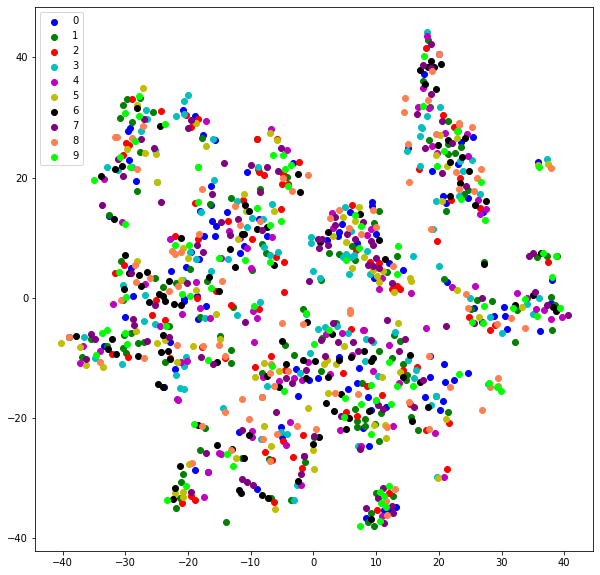

In [21]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train_pca[:1000]) ## Reduced for computational issues
colors_map = np.argmax(y_train_pca, axis=1)

colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(10):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

In [32]:
pca_model = Sequential()
# starting with very simple model
pca_model.add(Dense(units=1,input_shape=(25,)))  #input layer
pca_model.add(Dense(units=10, activation='softmax'))                    # output layer
pca_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 26        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


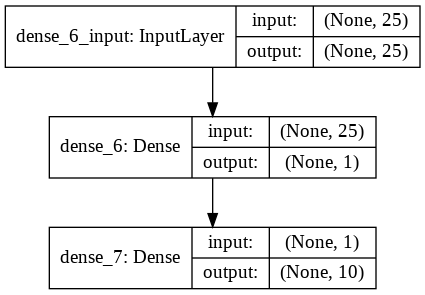

In [23]:
plot_model(pca_model, to_file='pca_model.png', show_shapes=True, show_layer_names=True)

In [24]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(X_test_pca, y_test_pca, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Train on 2160 samples, validate on 240 samples
Epoch 1/20
2160/2160 [==============================] - 0s 53us/step - loss: 2.3833 - acc: 0.0986 - val_loss: 2.3615 - val_acc: 0.1208
Epoch 2/20
2160/2160 [==============================] - 0s 21us/step - loss: 2.3723 - acc: 0.0972 - val_loss: 2.3543 - val_acc: 0.1083
Epoch 3/20
2160/2160 [==============================] - 0s 20us/step - loss: 2.3628 - acc: 0.0981 - val_loss: 2.3482 - val_acc: 0.1250
Epoch 4/20
2160/2160 [==============================] - 0s 24us/step - loss: 2.3547 - acc: 0.0977 - val_loss: 2.3433 - val_acc: 0.1417
Epoch 5/20
2160/2160 [==============================] - 0s 20us/step - loss: 2.3477 - acc: 0.0963 - val_loss: 2.3390 - val_acc: 0.1292
Epoch 6/20
2160/2160 [==============================] - 0s 22us/step - loss: 2.3418 - acc: 0.0972 - val_loss: 2.3351 - val_acc: 0.1333
Epoch 7/20
2160/2160 [==============================] - 0s 21us/step - loss: 2.3364 - acc: 0.1000 - val_loss: 2.3324 - val_acc: 0.1458
Epoch 8/

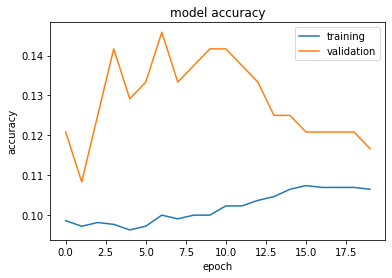

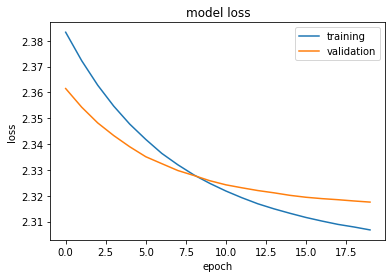

Test loss: 2.31
Test accuracy: 0.118


In [25]:
pca_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
history = pca_model.fit(X_train_pca, y_train_pca, batch_size=128, epochs=20, verbose=True, validation_split=.1)
plot_training_history(history, pca_model)

In [35]:
model_pca= Sequential()
model_pca.add(Dense(units=64, activation='relu', input_shape=(25,)))
model_pca.add(Dense(units=32, activation='relu'))
model_pca.add(Dense(units=32, activation='relu'))
model_pca.add(Dense(units=10, activation='softmax'))
model_pca.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


Train on 2160 samples, validate on 240 samples
Epoch 1/50
2160/2160 [==============================] - 0s 71us/step - loss: 2.3325 - acc: 0.1069 - val_loss: 2.3334 - val_acc: 0.0708
Epoch 2/50
2160/2160 [==============================] - 0s 25us/step - loss: 2.2957 - acc: 0.1315 - val_loss: 2.3250 - val_acc: 0.0875
Epoch 3/50
2160/2160 [==============================] - 0s 32us/step - loss: 2.2819 - acc: 0.1509 - val_loss: 2.3215 - val_acc: 0.0792
Epoch 4/50
2160/2160 [==============================] - 0s 24us/step - loss: 2.2703 - acc: 0.1542 - val_loss: 2.3249 - val_acc: 0.0917
Epoch 5/50
2160/2160 [==============================] - 0s 23us/step - loss: 2.2607 - acc: 0.1667 - val_loss: 2.3251 - val_acc: 0.0958
Epoch 6/50
2160/2160 [==============================] - 0s 24us/step - loss: 2.2515 - acc: 0.1755 - val_loss: 2.3254 - val_acc: 0.0917
Epoch 7/50
2160/2160 [==============================] - 0s 24us/step - loss: 2.2417 - acc: 0.1866 - val_loss: 2.3293 - val_acc: 0.0958
Epoch 8/

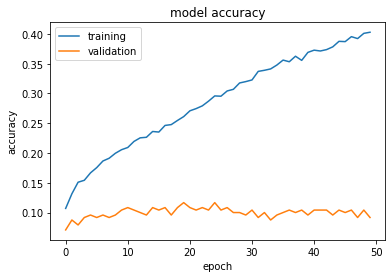

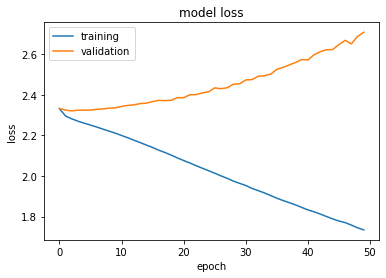

Test loss: 2.78
Test accuracy: 0.103


In [36]:
model_pca.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
history = model_pca.fit(X_train_pca, y_train_pca, batch_size=128, epochs=50, verbose=True, validation_split=.1)
plot_training_history(history, model_pca)

(2048,)


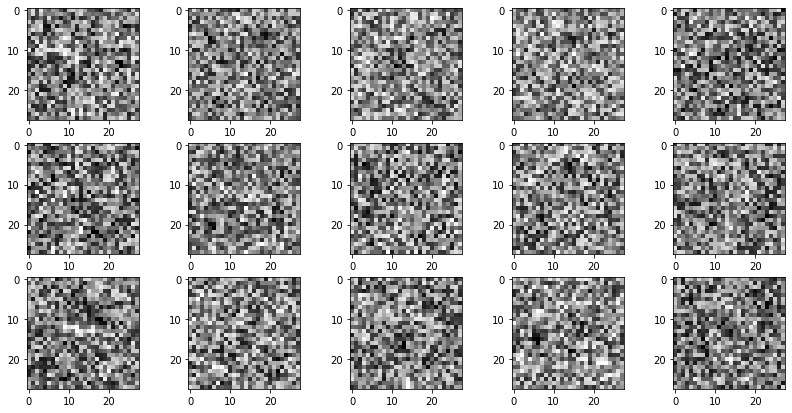

In [28]:
# We can get an 
#W = model.layers[0].W.get_value() # Weight matrix W is a shared variable object, not a numpy array.
W = long_model_two.layers[0].get_weights()[0]
print (W[0].shape)
plt.figure(1, figsize=(14,7))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='gray', interpolation='none')

(512,)


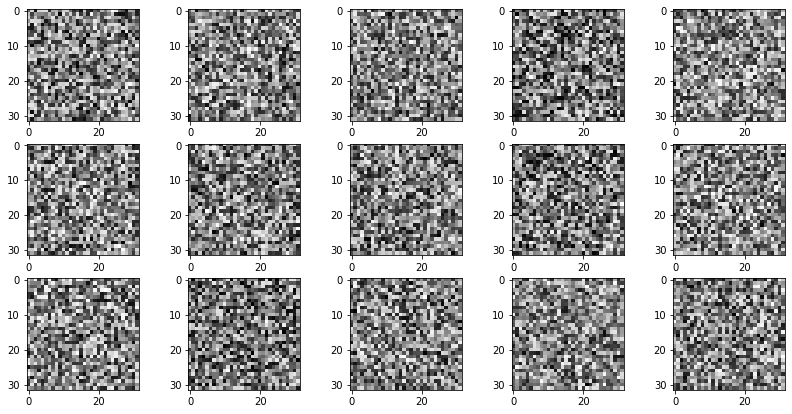

In [29]:
# We can get an 
#W = model.layers[0].W.get_value() # Weight matrix W is a shared variable object, not a numpy array.
W = long_model_two.layers[3].get_weights()[0]
print (W[0].shape)
plt.figure(1, figsize=(14,7))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(W[:,i].reshape(32,32), cmap='gray', interpolation='none')

(10,)


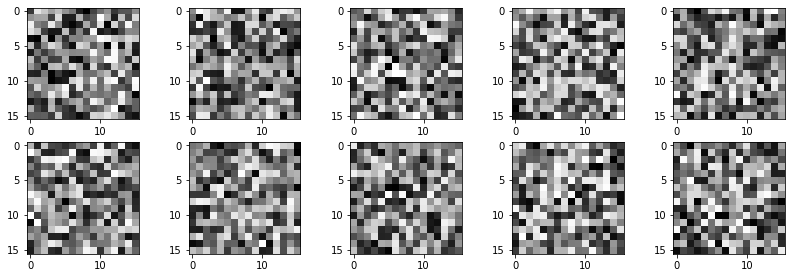

In [30]:
# We can get an 
#W = model.layers[0].W.get_value() # Weight matrix W is a shared variable object, not a numpy array.
W = long_model_two.layers[7].get_weights()[0]
print (W[0].shape)
plt.figure(1, figsize=(14,7))
for i in range(10):
    plt.subplot(3,5,i+1)
    plt.imshow(W[:,i].reshape(16,16), cmap='gray', interpolation='none')